<a href="https://colab.research.google.com/github/ElenJ/ML_Demos/blob/main/Kaplan_Meyer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install lifelines

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.7/115.7 kB 6.7 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4030 sha256=6981491a22e374758dc980859b3c85a467bf20d7b5387d28d08317859f8ccf22
  Stored in directory: /root/.cache/pip/wheels/8b/67/f4/2caaae2146198dcb824f31a303833b07b14a5ec863fb3acd7b
Successfully built autograd-gamma


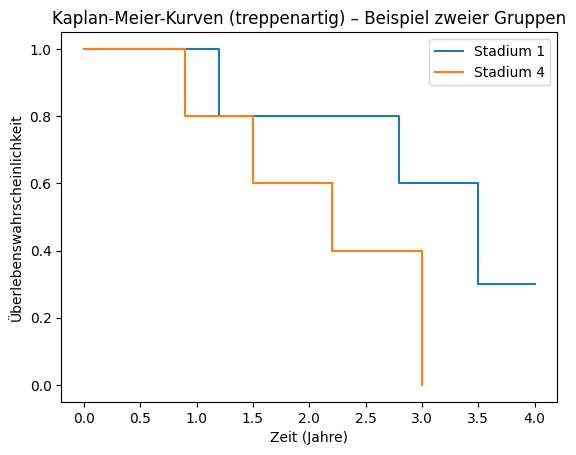

In [5]:
import pandas as pd
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

# Beispiel-Daten
data = {
    'Überlebenszeit': [1.2, 2.8, 3.1, 3.5, 4.0, 0.9, 1.5, 2.2, 2.5, 3.0],
    'Ereignis':       [1,   1,   0,   1,   0,   1,   1,   1,   0,   1],
    'Gruppe':         ['Stadium 1', 'Stadium 1', 'Stadium 1', 'Stadium 1', 'Stadium 1', 'Stadium 4', 'Stadium 4', 'Stadium 4', 'Stadium 4', 'Stadium 4']
}
df = pd.DataFrame(data)

kmf = KaplanMeierFitter()

for label, grouped_df in df.groupby('Gruppe'):
    kmf.fit(grouped_df['Überlebenszeit'], grouped_df['Ereignis'], label= label)
    kmf.plot_survival_function(ci_show=False)  # ohne Konfidenzintervall/SD

plt.title("Kaplan-Meier-Kurven (treppenartig) – Beispiel zweier Gruppen")
plt.xlabel("Zeit (Jahre)")
plt.ylabel("Überlebenswahrscheinlichkeit")
plt.show()